# Titanic: machine learnding for first timers

The aim of this notebook is mostly to learn new things and put into practise my learnings that I have been going through for the last two years! 
 To do this, we will: 
 
 * Import the libraries we need
 * Combine the test and train csv's into one mega csv
 * Perform analysis on the combined df to analyse each column in turn to get an idea of what the data is telling us about all passengers. We will also plot graphs of numbers and divisions (eg class, cabin number etc) to show this data more prettily.
 * After this, we will look at the train dataset, as this gives us data on who survived or not. This will be broken down into two datasets, survived and ded
 * The same analysis will be performed on the two new dfs, to see if we can work out who is most likely to survive, and who should be denied a ticket to titanic 2: the revenge, where they go in hunt of the iceberg that killed titanic's father
 * The differences in the two groups will be plotted on graphs to show visually how best to handle who goes where.
 * Finally, we will try to apply a machine learning model to the data and see if we can predict who in the test dataset survived (and by extension who didn't). 

It should be noted I haven't done much machine learning before, nor indeed written a program that will be this large. So to whomever is reading this, when you see something that looks dumb and question 'why did he do that?', please just bear this in mind... 

In order to perform the analysis, first things first we want to import the libraries we are going to use.

In [1]:
#import pandas, seaborn and csv reader
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

Next up, we need to get the data. I downloaded the CSV's from online onto this machine, assigned them to variables, then concatenated them into full_df

In [9]:
#import csv for manipulating
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')
#create tables based upon if people survived or died
survivors = train[train.Survived == 1]
survivors = survivors.reset_index()
dead_uns = train[train.Survived == 0]
dead_uns = dead_uns.reset_index()
#combine to one mega csv
full_df = pd.concat([train, test])


Now we want to see what all the columns are in our dataset

In [3]:
#print out the number and name of the columns
x = []
for i in full_df.columns:
    x.append (i)
passenger_numbers = full_df.PassengerId.count()
print ("There are a total of " + str(len(x)) + " columns in the data. The columns are named... " + str(x))
print ("In the data we have a total of " + str(passenger_numbers) + " passengers on the ship.")




There are a total of 12 columns in the data. The columns are named... ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
In the data we have a total of 1309 passengers on the ship.


We'll go left to right along the columns, as that seems to be the most logical method to a mind used to reading left to right. Probably wouldn't be to someone writing Hebrew or Japanese for example, but there we go.

There are many columns to analyse here, some discrete and others continuous data. They break down as follows: 

Continuous columns: 

- Age
- Fare

Discrete columns: 

- Survived
- Passenger Class (Pclass)
- Sex
- Sibling numbers on board (SibSp)
- Ticket
- Cabin
- Where they embarked (Embarked)

I will be analysing the data in three ways: The full dataset, the people who survived, and the people who died.

To analyse these, I will be doing different measures of the data. For the continuous data, I will calculate the mean, median, maximum value, minimum value, and standard deviation, before plotting them on a histogram. 

For the discrete data, we will already be analysing for the survival. So we will instead look at this data via counts, and percentages to see the split of passengers.

First column to analyse will be passenger class. Therefore, we will see what the split of the population is by pure numbers. After this, we will look at the age, sex, number of siblings, parents/children, fare, and where they embarked of the different classes, to get a better idea of the division of rich vs poor people.

Pclass
1    323
2    277
3    709
Name: PassengerId, dtype: int64


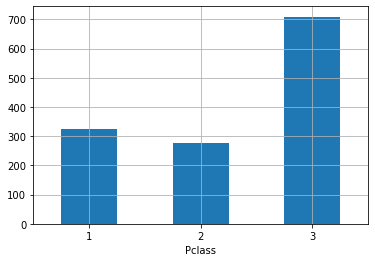

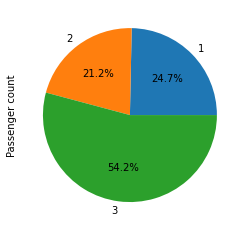

In [27]:
class_breakdown = full_df.groupby('Pclass').PassengerId.count()

print (class_breakdown)
ax = class_breakdown.plot.bar(rot= 0, grid = True)
plt.show()
ax = class_breakdown.plot.pie(rot= 0, autopct='%1.1f%%', label = 'Passenger count', grid = True)
plt.show()
#full_df.groupby('Pclass').Grade.count()

But what classes were the survivors in? And what of the casualties? 

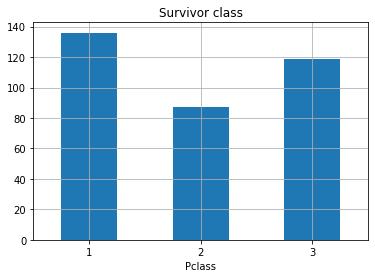

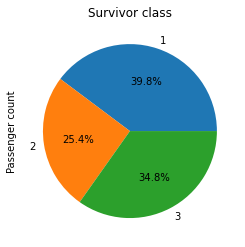

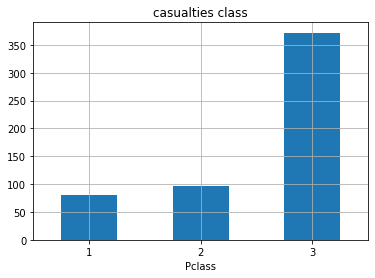

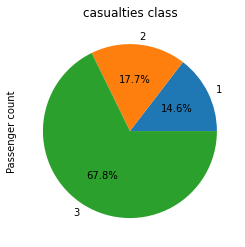

Well that's not a surprise, the poor people die disproportionatly. Again...


In [28]:
survivors_class_breakdown = survivors.groupby('Pclass').PassengerId.count()
casualties_class_breakdown = dead_uns.groupby('Pclass').PassengerId.count()

ax_sur = survivors_class_breakdown.plot.bar(rot= 0, grid = True, title = 'Survivor class')
plt.show()
ax_sur = survivors_class_breakdown.plot.pie(rot= 0, grid = True, autopct='%1.1f%%', label = 'Passenger count', title = 'Survivor class')
plt.show()

ax_cas = casualties_class_breakdown.plot.bar(rot= 0, grid = True, title = 'casualties class')
plt.show()
ax_cas = casualties_class_breakdown.plot.pie(rot= 0, grid = True, autopct='%1.1f%%', label = 'Passenger count', title = 'casualties class')
plt.show()
#full_df.groupby('Pclass').Grade.count()

print ('Well that\'s not a surprise, the poor people die disproportionatly. Again...')

#Could put in here the percentage of survivals in each class, to really show lopsidedness? However, missing data so wouldn't be a full picture...

Next we'll look at the gender breakdown for the full df, then survivors/casualties

Sex
female    466
male      843
Name: PassengerId, dtype: int64


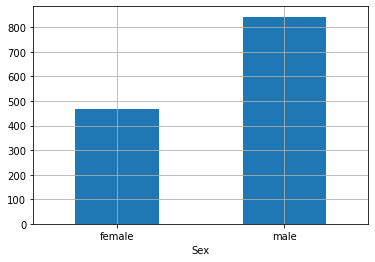

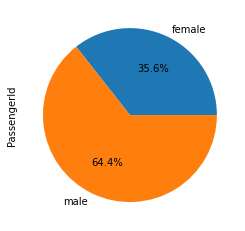

Bit of a sausage fest...


In [29]:
sex_breakdown = full_df.groupby('Sex').PassengerId.count()

print (sex_breakdown)
#Question: Is this a new dataframe? In which case, can I just perform transformation of the columns to work out percentage split?
ax = sex_breakdown.plot.bar(rot= 0, grid = True)
plt.show()
ax = sex_breakdown.plot.pie(rot= 0, autopct='%1.1f%%', grid = True)
plt.show()
print ('Bit of a sausage fest...')


Next, we'll compare the sex of survivors

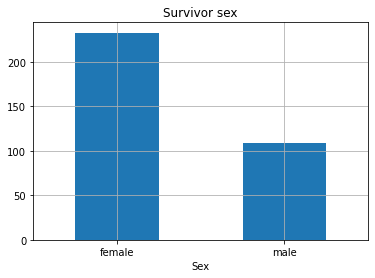

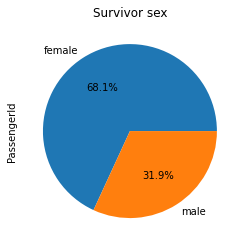

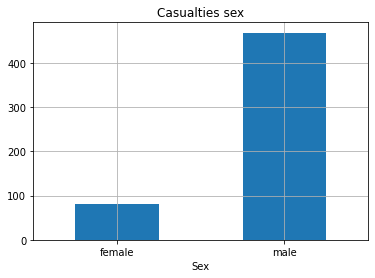

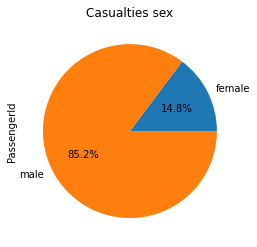

Really does pay to be a lady in this one specific instance!


In [30]:
survivors_sex_breakdown = survivors.groupby('Sex').PassengerId.count()
casualties_sex_breakdown = dead_uns.groupby('Sex').PassengerId.count()

ax_sur = survivors_sex_breakdown.plot.bar(rot= 0, grid = True, title = 'Survivor sex')
plt.show()
ax_sur = survivors_sex_breakdown.plot.pie(rot= 0, grid = True, autopct='%1.1f%%', title = 'Survivor sex')
plt.show()

ax_cas = casualties_sex_breakdown.plot.bar(rot= 0, grid = True, title = 'Casualties sex')
plt.show()
ax_cas = casualties_sex_breakdown.plot.pie(rot= 0, grid = True, autopct='%1.1f%%', title = 'Casualties sex')
plt.show()

print ('Really does pay to be a lady in this one specific instance!')



Next up is the number of siblings on board...

SibSp
0    891
1    319
2     42
3     20
4     22
5      6
8      9
Name: PassengerId, dtype: int64


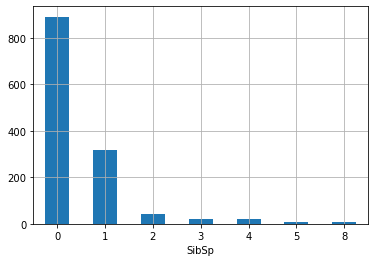

Parch
0    1002
1     170
2     113
3       8
4       6
5       6
6       2
9       2
Name: PassengerId, dtype: int64


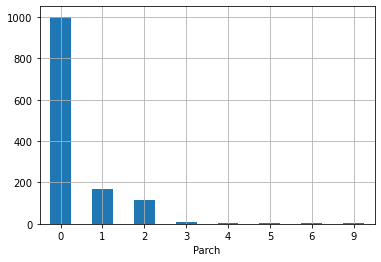

In [31]:
sib_breakdown = full_df.groupby('SibSp').PassengerId.count()
parch_breakdown = full_df.groupby('Parch').PassengerId.count()

print (sib_breakdown)
ax = sib_breakdown.plot.bar(rot= 0, grid = True)
plt.show()
print (parch_breakdown)
ax = parch_breakdown.plot.bar(rot= 0, grid = True)
plt.show()
#ax = sib_breakdown.plot.pie(rot= 0, autopct='%1.1f%%', grid = True)
#plt.show()

#full_df.groupby('Pclass').Grade.count()

Survivors vs casualties

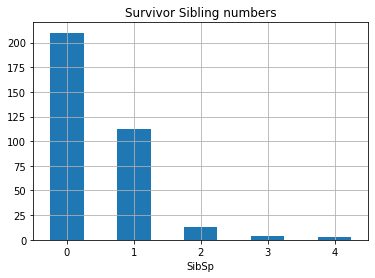

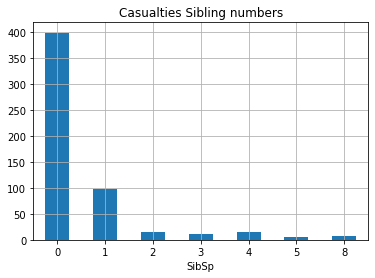

They're pretty similar shaped, I suppose that makes sense as most people didn't have a sibling. Either way, as they show a similar shape, this is unlikely to be a good predictor of survivors. Although the people with load of siblings appear to have low chances of survival, could this be due to them being in a group more likely to die?


In [32]:
survivors_sib_breakdown = survivors.groupby('SibSp').PassengerId.count()
casualties_sib_breakdown = dead_uns.groupby('SibSp').PassengerId.count()

ax_sur = survivors_sib_breakdown.plot.bar(rot= 0, grid = True, title = 'Survivor Sibling numbers')
plt.show()

ax_cas = casualties_sib_breakdown.plot.bar(rot= 0, grid = True, title = 'Casualties Sibling numbers')
plt.show()

print ('They\'re pretty similar shaped, I suppose that makes sense as most people didn\'t have a sibling. Either way, as they show a similar shape, this is unlikely to be a good predictor of survivors. Although the people with load of siblings appear to have low chances of survival, could this be due to them being in a group more likely to die?')

#Worth asking if poor people are more likely to have siblings on board? 

Embarkment port

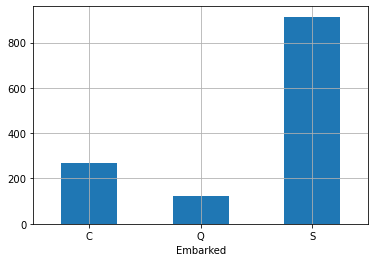

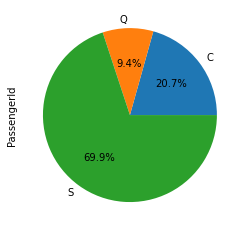

In [33]:
port_breakdown = full_df.groupby('Embarked').PassengerId.count()

ax = port_breakdown.plot.bar(rot= 0, grid = True)
plt.show()
ax1 = port_breakdown.plot.pie(rot= 0, autopct='%1.1f%%', grid = True)
plt.show()



Survivors vs casualties

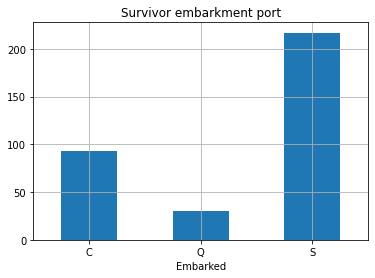

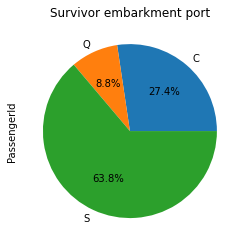

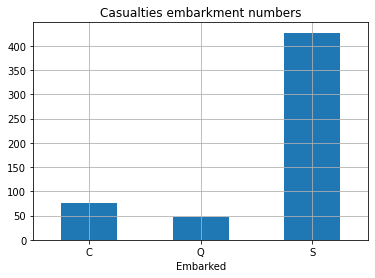

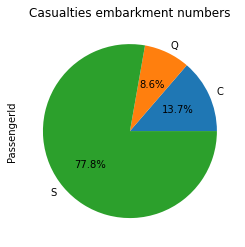

In [34]:
survivors_port_breakdown = survivors.groupby('Embarked').PassengerId.count()
casualties_port_breakdown = dead_uns.groupby('Embarked').PassengerId.count()

ax_sur = survivors_port_breakdown.plot.bar(rot= 0, grid = True, title = 'Survivor embarkment port')
plt.show()

ax_sur = survivors_port_breakdown.plot.pie(rot= 0, grid = True, autopct='%1.1f%%', title = 'Survivor embarkment port')
plt.show()

ax_cas = casualties_port_breakdown.plot.bar(rot= 0, grid = True, title = 'Casualties embarkment numbers')
plt.show()

ax_cas = casualties_port_breakdown.plot.pie(rot= 0, grid = True, autopct='%1.1f%%', title = 'Casualties embarkment numbers')
plt.show()


Looks like people who embarked at Southampton died disporportionally, which raises the question: based upon the information already provided, were there a lot of poor people from Southampton?

Does the Cabin details provide any useful measures? A few things we need to look at first...

- Cabin number is discrete, and all different
- However, all Cabin details start with a letter: therefore, for ease of use, we will take the [0] index and go off that for the deck the passenger was on
- We also need to bear in mind there is limited data for this: below is the number of rows with data...


In [35]:
cabin_breakdown = full_df.Cabin.count()
print (cabin_breakdown)
total_numbers = full_df.PassengerId.count()
print (total_numbers)

x = (cabin_breakdown / total_numbers) * 100
x = x.round(2)
print (str(x) + '%')

cabin_full_info_breakdown = train.Cabin.count()
print (cabin_full_info_breakdown)
total_full_info_numbers = train.PassengerId.count()
y = (cabin_full_info_breakdown / total_full_info_numbers) * 100
y = y.round(2)
print (y)



295
1309
22.54%
204
22.9


We only have the data for 22.54% of the passengers, so really we don't have much to work on. I will complete the analysis, but really we need to see an extremely clear effect to extrapolate any information from this. 

In [36]:
cabins = full_df["Cabin"]

#cabins = cabins.dropna()
#cabins_all = cabins.groupby('cabin').ID.count()





Before we start looking at intersecting groups, let's first breakdown the ages and fares of the people on board, that being continuous data

              Age            
             mean   min   max
Pclass                       
1       39.159930  0.92  80.0
2       29.506705  0.67  70.0
3       24.816367  0.17  74.0
The mean age of all passengers was 29.88.
The median age of all passengers was 28.0.
As the mean and median are similar, this indicates that the age of the passengers follows a (roughly) normal distribution.
The oldest of all passengers was 80.0.
The youngest of all passengers was 0.17.
The standard deviation of the ages of all passengers onboard was 14.413493211271334.
What we can tell from this is that, as this data generally follows a normal distribution with some left skew, 68% of the passengers were between the ages of 16 and 44.


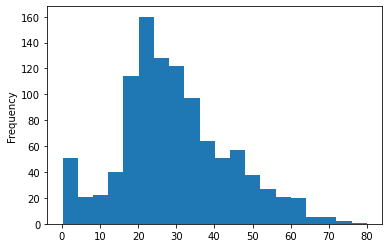

In [37]:
grouped_age = full_df.groupby('Pclass').agg({'Age': ['mean', 'min', 'max']})

print (grouped_age)


mean_age = full_df.Age.mean()
mean_age = round(mean_age, 2)
print ('The mean age of all passengers was ' + str(mean_age) + '.')
median_age = full_df.Age.median()
print ('The median age of all passengers was ' + str(median_age) + '.')
print ('As the mean and median are similar, this indicates that the age of the passengers follows a (roughly) normal distribution.')
max_age = full_df.Age.max()
print ('The oldest of all passengers was ' + str(max_age) + '.')
min_age = full_df.Age.min()
print ('The youngest of all passengers was ' + str(min_age) + '.')
sd_age = full_df.Age.std()
print ('The standard deviation of the ages of all passengers onboard was ' + str(sd_age) + '.')
hist_age = full_df.Age.plot.hist(bins=20, alpha=1)
print ('What we can tell from this is that, as this data generally follows a normal distribution with some left skew, 68% of the passengers were between the ages of 16 and 44.')



Next let's look at the survivors against the unlucky ones. Maybe something about their age will reveal some information about chances of survival...

From this, we can see that actually the difference between the two ages is quite small: survivors mean age was 28.34 and the casualties mean age was 30.63.
And actually, the median is the same: 28.0 for survivors and 28.0 for casualties.
80.0
74.0
0.42
1.0
14.950951984140426
14.17210987713849


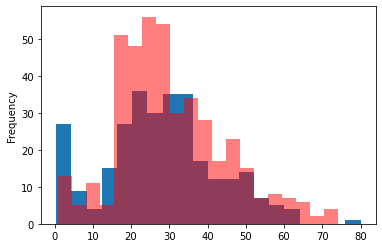

In [38]:
mean_age_live = survivors.Age.mean()
mean_age_live = round(mean_age_live, 2)
mean_age_dead = dead_uns.Age.mean()
mean_age_dead = round(mean_age_dead, 2)
print ('From this, we can see that actually the difference between the two ages is quite small: survivors mean age was ' + str(mean_age_live) + ' and the casualties mean age was ' + str(mean_age_dead) + '.')
 

median_age_live = survivors.Age.median()
median_age_live = round(median_age_live, 2)
median_age_dead = dead_uns.Age.median()
median_age_dead = round(median_age_dead, 2)
print ('And actually, the median is the same: ' + str(median_age_live) + ' for survivors and ' + str(median_age_dead) + ' for casualties.')

max_age_live = survivors.Age.max()
max_age_dead = dead_uns.Age.max()
print (max_age_live)
print (max_age_dead)

min_age_live = survivors.Age.min()
min_age_dead = dead_uns.Age.min()
print (min_age_live)
print (min_age_dead)

std_age_live = survivors.Age.std()
std_age_dead = dead_uns.Age.std()
print (std_age_live)
print (std_age_dead)

hist_age_survivors = survivors.Age.plot.hist(bins=20, alpha= 1.0)
hist_age_dead = dead_uns.Age.plot.hist(bins=20, alpha=0.5, color = 'red')
plt.show()

Let's take a look to see how fare correlates with survival chances... 

33.3
14
512.3292
0.0
51.75866823917414


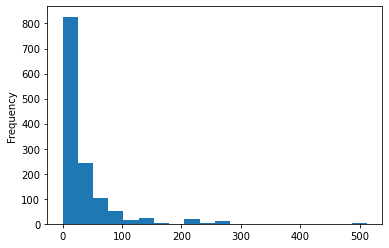

In [39]:
mean_fare = full_df.Fare.mean()
mean_fare = round(mean_fare, 2)

print (mean_fare)

median_fare = full_df.Fare.median()
median_fare = round(median_fare)
print (median_fare)

max_fare = full_df.Fare.max()
print (max_fare)

min_fare = full_df.Fare.min()
print (min_fare)

std_dev_fare = full_df.Fare.std()
print (std_dev_fare)

hist_fares = full_df.Fare.plot.hist(bins=20, alpha= 1.0)
plt.show()

And now, we'll compare the living to the dead...

The mean fare of survivors was 48.4 and the mean fare of those who died was 22.12. Wow, it pays to buy a nice ticket...
The median fare of survivors was 26 and the median fare of those who died was 10. In both cases the median is considerably lower than the mean, showing that the data skews towards lower fares.
The maximum fare for survivors was 512.3292 and the most a casualty paid was 263.0.
In contrast, the lowest fare for survivors was 0.0 and the least a casualty paid was 0.0 (STOWAWAYS!). This shows that whilst fare paid is a powerful indicator of survival, it is not the only determinant factor.
The standard deviation for the survivors was 66.59699811829472 and the SD for casualties was 31.388206530563984. Pretty high numbers showing pretty disperate groups, as shown in the histogram below!


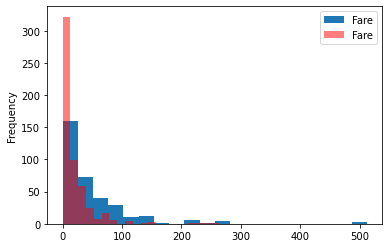

In [40]:
mean_fare_live = survivors.Fare.mean()
mean_fare_live = round(mean_fare_live, 2)
mean_fare_dead = dead_uns.Fare.mean()
mean_fare_dead = round(mean_fare_dead, 2)
print ('The mean fare of survivors was ' + str(mean_fare_live) + ' and the mean fare of those who died was ' + str(mean_fare_dead) + '. Wow, it pays to buy a nice ticket...') 


median_fare_live = survivors.Fare.median()
median_fare_live = round(median_fare_live)
median_fare_dead = dead_uns.Fare.median()
median_fare_dead = round(median_fare_dead)
print ('The median fare of survivors was ' + str(median_fare_live) + ' and the median fare of those who died was ' + str(median_fare_dead) + '. In both cases the median is considerably lower than the mean, showing that the data skews towards lower fares.') 


max_fare_live = survivors.Fare.max()
max_fare_dead = dead_uns.Fare.max()
min_fare_live = survivors.Fare.min()
min_fare_dead = dead_uns.Fare.min()
print ('The maximum fare for survivors was ' + str(max_fare_live) + ' and the most a casualty paid was ' + str(max_fare_dead) + '.')
print ('In contrast, the lowest fare for survivors was ' + str(min_fare_live) + ' and the least a casualty paid was ' + str(min_fare_dead) + ' (STOWAWAYS!). This shows that whilst fare paid is a powerful indicator of survival, it is not the only determinant factor.')

std_fare_live = survivors.Fare.std()
std_fare_dead = dead_uns.Fare.std()
print ('The standard deviation for the survivors was ' + str(std_fare_live) + ' and the SD for casualties was ' + str(std_fare_dead) + '. Pretty high numbers showing pretty disperate groups, as shown in the histogram below!')


hist_fare_survivors = survivors.Fare.plot.hist(bins=20, alpha= 1.0)
hist_fare_dead = dead_uns.Fare.plot.hist(bins=20, alpha=0.5, color = 'red')
plt.legend()
plt.show()

# Checkpoint

So far, we can draw the following conclusions from the data we have been provided: 

- Poor people, males, and older people are more to have died in the disaster
- People from Southampton died disproportionaly to people who embarked elsewhere. 
- 

## Next steps

Next I will compare some groups against each other, to determine if they correlate together, or if they're unrelated. For the next step I will compare: 

- Sex vs Fare: As poor males died disporportionally, were there more poor individuals who were male? Or are the two unrelated (women anc children first)?
- Port of embarkation vs fare, age and sex: Southampton people died disproportionally, were they poorer? Older? Male in greater numbers?
- 



Now let's look at them divided by passenger class AND gender. Maybe we can find out more about the sort of person in each class if we go more granular on their details...

Sex
female    46.198097
male      26.154601
Name: Fare, dtype: float64
Sex
female    23.0000
male      11.8875
Name: Fare, dtype: float64
Sex
female    512.3292
male      512.3292
Name: Fare, dtype: float64
Sex
female    6.75
male      0.00
Name: Fare, dtype: float64
Sex
female    63.292599
male      42.486877
Name: Fare, dtype: float64


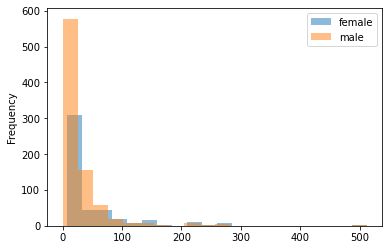

In [41]:
print (full_df.groupby('Sex').Fare.mean())
print (full_df.groupby('Sex').Fare.median())
print (full_df.groupby('Sex').Fare.max())
print (full_df.groupby('Sex').Fare.min())
print (full_df.groupby('Sex').Fare.std())

ax = full_df.groupby('Sex').Fare.plot.hist(bins=20, alpha= 0.5)
plt.legend()
plt.show()


Next, we'll compare the fares of women and men who survived and died

The mean fare of survivors was Sex
female    51.94
male      40.82
Name: Fare, dtype: float64 and the mean fare of those who died was Sex
female    23.02
male      21.96
Name: Fare, dtype: float64. Wow, it pays to buy a nice ticket...
The median fare of survivors was Sex
female    26.00
male      26.29
Name: Fare, dtype: float64 and the median fare of those who died was Sex
female    15.25
male       9.42
Name: Fare, dtype: float64. In both cases the median is considerably lower than the mean, showing that the data skews towards lower fares.
The maximum fare for survivors was Sex
female    512.33
male      512.33
Name: Fare, dtype: float64 and the most a casualty paid was Sex
female    151.55
male      263.00
Name: Fare, dtype: float64.
Sex
female    7.22
male      0.00
Name: Fare, dtype: float64
Sex
female    6.75
male      0.00
Name: Fare, dtype: float64
The standard deviation for the survivors was Sex
female    64.102256
male      71.355967
Name: Fare, dtype: float64 and the SD for 

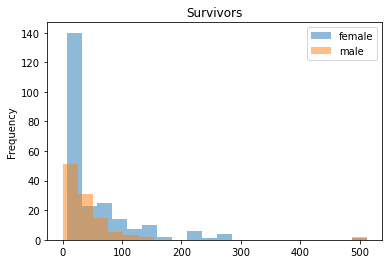

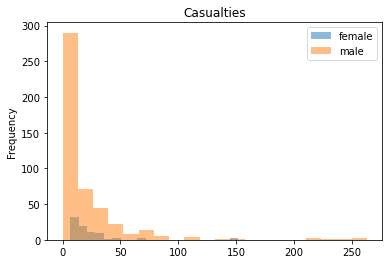

In [42]:
mean_fare_live = (survivors.groupby('Sex').Fare.mean())
mean_fare_live = round(mean_fare_live, 2)
mean_fare_dead = (dead_uns.groupby('Sex').Fare.mean())
mean_fare_dead = round(mean_fare_dead, 2)
print ('The mean fare of survivors was ' + str(mean_fare_live) + ' and the mean fare of those who died was ' + str(mean_fare_dead) + '. Wow, it pays to buy a nice ticket...') 



median_fare_live = (survivors.groupby('Sex').Fare.median())
median_fare_live = round(median_fare_live, 2)
median_fare_dead = (dead_uns.groupby('Sex').Fare.median())
median_fare_dead = round(median_fare_dead, 2)
print ('The median fare of survivors was ' + str(median_fare_live) + ' and the median fare of those who died was ' + str(median_fare_dead) + '. In both cases the median is considerably lower than the mean, showing that the data skews towards lower fares.') 


max_fare_live = (survivors.groupby('Sex').Fare.max())
max_fare_live = round(max_fare_live, 2)
max_fare_dead = (dead_uns.groupby('Sex').Fare.max())
max_fare_dead = round(max_fare_dead, 2)
print ('The maximum fare for survivors was ' + str(max_fare_live) + ' and the most a casualty paid was ' + str(max_fare_dead) + '.')
#print ('In contrast, the lowest fare for survivors was ' + str(min_fare_live) + ' and the least a casualty paid was ' + str(min_fare_dead) + ' (STOWAWAYS!). This shows that whilst fare paid is a powerful indicator of survival, it is not the only determinant factor.')

min_fare_live = (survivors.groupby('Sex').Fare.min())
min_fare_live = round(min_fare_live, 2)
min_fare_dead = (dead_uns.groupby('Sex').Fare.min())
min_fare_dead = round(min_fare_dead, 2)
print (min_fare_live)
print (min_fare_dead)

std_fare_live = (survivors.groupby('Sex').Fare.std())
std_fare_dead = (dead_uns.groupby('Sex').Fare.std())
print ('The standard deviation for the survivors was ' + str(std_fare_live) + ' and the SD for casualties was ' + str(std_fare_dead) + '. Pretty high numbers showing pretty disperate groups, as shown in the histogram below!')


hist_fare_survivors = survivors.groupby('Sex').Fare.plot.hist(bins=20, alpha= 0.5, title = 'Survivors')    
plt.legend()
plt.show()
hist_fare_dead = dead_uns.groupby('Sex').Fare.plot.hist(bins=20, alpha=0.5, title = 'Casualties')
plt.legend()
plt.show()

So it looks like men who paid a lower fare were more likely to die than women who paid a similar fare. It is worth mentioning that no woman apparently paid for the cheapest 'seats', and the majority of the men who died paid <£5 to ride. Now we will see the fare paid at Southampton, and see if that is relevant to predicting survival chances.

Embarked
C    62.336267
Q    12.409012
S    27.418824
Name: Fare, dtype: float64
Embarked
C    28.51875
Q     7.75000
S    13.00000
Name: Fare, dtype: float64
Embarked
C    512.3292
Q     90.0000
S    263.0000
Name: Fare, dtype: float64
Embarked
C    4.0125
Q    6.7500
S    0.0000
Name: Fare, dtype: float64
Embarked
C    84.185996
Q    13.616133
S    37.096402
Name: Fare, dtype: float64


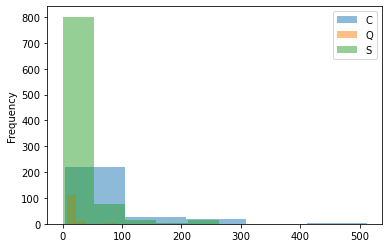

In [43]:
print (full_df.groupby('Embarked').Fare.mean())
print (full_df.groupby('Embarked').Fare.median())
print (full_df.groupby('Embarked').Fare.max())
print (full_df.groupby('Embarked').Fare.min())
print (full_df.groupby('Embarked').Fare.std())
ax = full_df.groupby('Embarked').Fare.plot.hist(bins = 5, alpha = 0.5)
#reduced the bins so it's a bit clearer. All we want to see is the trends...
plt.legend()
plt.show()

#ax = full_df.groupby('Embarked').plot.box(by = ["Fare"])



As we can see above from the differences in mean and the histogram, people who embarked at Queenstown and Southampton were generally poorer than the Cherbourg people. This all seems like conclusive proof that poor people died disproportionally. 

# Checkpoint: 

What have we found so far? The main take home messages from comparing the columns is: 
- Don't be poor: poor people died disporportionally regardless of sex or port of embarkation
- People embarking in Cherbourg were richer than the others, and this is why they died in lower proportions than the other ports people. They were not smarter or better at surviving...


Let's talk about machine learning: First we'll establish our train and test, by having Survival along the Y axis, and everything else along the x axis. 

Males are 0, Females are 1

In [10]:
full_df['Sex'] = full_df['Sex'].replace(['female'], 1)
full_df['Sex'] = full_df['Sex'].replace(['male'], 0)

full_df['Embarked'] = full_df['Embarked'].replace(['S'], 0)
full_df['Embarked'] = full_df['Embarked'].replace(['C'], 1)
full_df['Embarked'] = full_df['Embarked'].replace(['Q'], 2)

full_df = full_df.dropna()

full_df = full_df.drop(columns = "Name",axis =1)
full_df = full_df.drop(columns = "Ticket",axis =1)
full_df = full_df.drop(columns = "Cabin",axis =1)


X = full_df.drop(columns = "Survived",axis =1)
Y = full_df["Survived"]

In [11]:
print (full_df.head())

    Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
1        1.0       1    1  38.0      1      0  71.2833       1.0
3        1.0       1    1  35.0      1      0  53.1000       0.0
6        0.0       1    0  54.0      0      0  51.8625       0.0
10       1.0       3    1   4.0      1      1  16.7000       0.0
11       1.0       1    1  58.0      0      0  26.5500       0.0


Now we can split them into test and train:

In [12]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

Next up we have the model to select, honestly I've only looked at linear regression before so let's just do that!

In [13]:
model = LinearRegression()

model.fit(xtrain, ytrain)
xtrain_predict = model.predict(xtrain)
xtrain_predict = np.round(xtrain_predict).astype(int)

train_predict = pd.DataFrame({"Predicted Value" : xtrain_predict,
                              "Actual Value" : ytrain
})
train_predict.head()
train_predict.to_excel("output.xlsx")

Hmm, this isn't looking so hot... Maybe we need to see the correlation analysis, and find out how I'm doing...

In [1]:
train_accuracy = accuracy_score(xtrain_predict,ytrain)
print(train_accuracy)

NameError: name 'accuracy_score' is not defined

3.6 roentgen...

Ok, so from we've got, what can we tell? Provided with the data above, we can predict the likelihood of someone's survival in the test set with 76.7% accuracy. Therefore, if we had a new itinery of people, we could predict with 76.7% accuracy whether they would survive or not. At least that's the mathematical logic, if a 28 year old lady decided to be a hero and save 10 men aged 80, it'd be a turn up for the books, but life isn't just numbers after all. Almost renders this whole exercise pointless when you think of it that way... 